For your next coding assignment, you are coding a Q-learning agent

In [ ]:
#one way to maintain a maximum (or minimum) or a series of values
import random
temp = float('-inf') #initialization is important!
print(temp)
for i in range(10):
    x = -100*random.random()
    if x > temp:
        temp = x
print(temp)

-inf
-17.47163145695938


In [ ]:
#another useful function:
a = ['Baseball', 'Football', 'Darts']
s = random.choice(a)
print(s)

Football


In [ ]:
#util.Counter is derived from dict()

d = dict()

keyval = {("Boston", "MA"): 30874}
d.update(keyval)

city = "Pittsburgh"
state = 'PA'
num = 92834
d[(city, state)] = num

print(d)
print(d[('Boston', 'MA')])

{('Boston', 'MA'): 30874, ('Pittsburgh', 'PA'): 92834}
30874


For coding assignment 2: Fill in the five blue functions and the Q value data

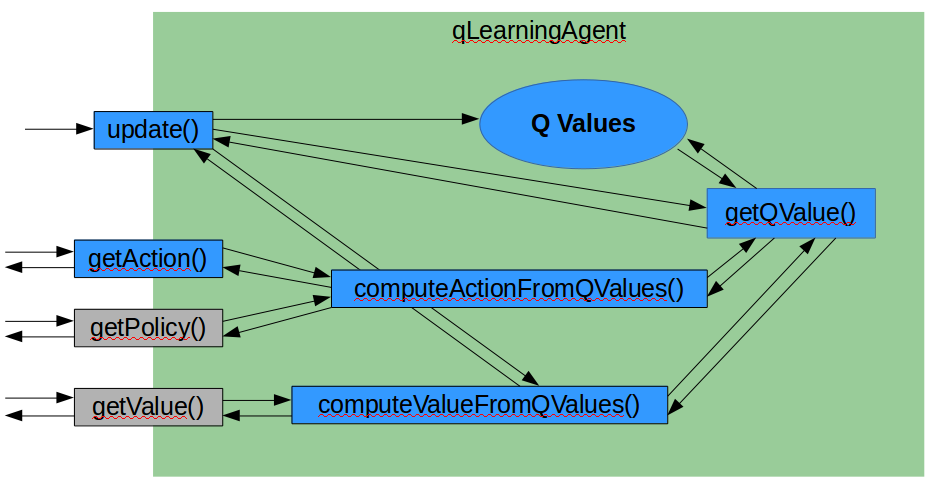

For coding assignment 3, change the two red functions and Q Value data (weights, feature extractor, etc.)

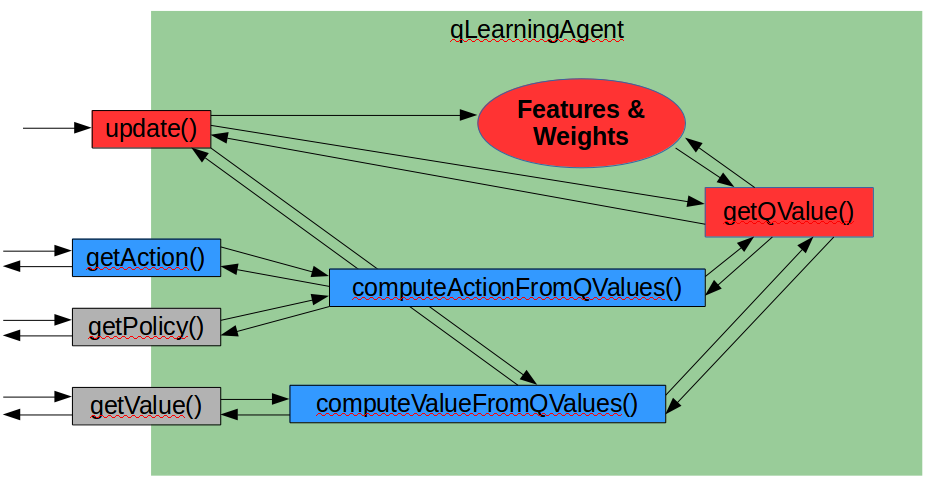

In [ ]:
class QLearningAgent(ReinforcementAgent):
    """
      Q-Learning Agent

      Functions you should fill in:
        - computeValueFromQValues
        - computeActionFromQValues
        - getQValue
        - getAction
        - update

      Instance variables you have access to
        - self.epsilon (exploration prob)
        - self.alpha (learning rate)
        - self.discount (discount rate)

      Functions you should use
        - self.getLegalActions(state)
          which returns legal actions for a state
    """
    def __init__(self, **args):
        self.Qvalues = util.Counter()
        #you should be able to address self.Qvalues[(state,action)]
        ReinforcementAgent.__init__(self, **args)



    def getQValue(self, state, action):
        """
          Returns Q(state,action)
          Should return 0.0 if we have never seen a state
          or the Q node value otherwise
        """
        "*** YOUR CODE HERE ***"
        util.raiseNotDefined() #replace this line
        #very simple
        #how do we handle "state never seen" ?
        #since we are using util.Counter(), read the definition closely


    def computeValueFromQValues(self, state):
        """
          Returns max_action Q(state,action)
          where the max is over legal actions.  Note that if
          there are no legal actions, which is the case at the
          terminal state, you should return a value of 0.0.
        """
        "*** YOUR CODE HERE ***"
        util.raiseNotDefined()
        #useful: self.getLegalActions() from learningAgents.getLegalActions()

    def computeActionFromQValues(self, state):
        """
          Compute the best action to take in a state.  Note that if there
          are no legal actions, which is the case at the terminal state,
          you should return None.
        """
        "*** YOUR CODE HERE ***"
        util.raiseNotDefined()
        #note this is closely related to computeValueFromQValues()

    def getAction(self, state):
        """
          Compute the action to take in the current state.  With
          probability self.epsilon, we should take a random action and
          take the best policy action otherwise.  Note that if there are
          no legal actions, which is the case at the terminal state, you
          should choose None as the action.

          HINT: You might want to use util.flipCoin(prob)
          HINT: To pick randomly from a list, use random.choice(list)
        """
        # Pick Action
        legalActions = self.getLegalActions(state)
        action = None
        "*** YOUR CODE HERE ***"
        util.raiseNotDefined()

        return action

    def update(self, state, action, nextState, reward):
        """
          The parent class calls this to observe a
          state = action => nextState and reward transition.
          You should do your Q-Value update here

          NOTE: You should never call this function,
          it will be called on your behalf
        """
        "*** YOUR CODE HERE ***"
        util.raiseNotDefined()

    def getPolicy(self, state):
        return self.computeActionFromQValues(state)

    def getValue(self, state):
        return self.computeValueFromQValues(state)


class PacmanQAgent(QLearningAgent):
    "Exactly the same as QLearningAgent, but with different default parameters"

    def __init__(self, epsilon=0.05,gamma=0.8,alpha=0.2, numTraining=0, **args):
        """
        These default parameters can be changed from the pacman.py command line.
        For example, to change the exploration rate, try:
            python pacman.py -p PacmanQLearningAgent -a epsilon=0.1

        alpha    - learning rate
        epsilon  - exploration rate
        gamma    - discount factor
        numTraining - number of training episodes, i.e. no learning after these many episodes
        """
        args['epsilon'] = epsilon
        args['gamma'] = gamma
        args['alpha'] = alpha
        args['numTraining'] = numTraining
        self.index = 0  # This is always Pacman
        QLearningAgent.__init__(self, **args)

    def getAction(self, state):
        """
        Simply calls the getAction method of QLearningAgent and then
        informs parent of action for Pacman.  Do not change or remove this
        method.
        """
        action = QLearningAgent.getAction(self,state)
        self.doAction(state,action)
        return action


class ApproximateQAgent(PacmanQAgent):
    """
       ApproximateQLearningAgent

       You should only have to overwrite getQValue
       and update.  All other QLearningAgent functions
       should work as is.
    """
    def __init__(self, extractor='IdentityExtractor', **args):
        self.featExtractor = util.lookup(extractor, globals())()
        PacmanQAgent.__init__(self, **args)
        self.weights = util.Counter()

    def getWeights(self):
        return self.weights

    def getQValue(self, state, action):
        """
          Should return Q(state,action) = w * featureVector
          where * is the dotProduct operator
        """
        "*** YOUR CODE HERE (IN CODING ASSIGNMENT 3) ***"
        util.raiseNotDefined()

    def update(self, state, action, nextState, reward):
        """
           Should update your weights based on transition
        """
        "*** YOUR CODE HERE (IN CODING ASSIGNMENT 3) ***"
        util.raiseNotDefined()

    def final(self, state):
        "Called at the end of each game."
        # call the super-class final method
        PacmanQAgent.final(self, state)

        # did we finish training?
        if self.episodesSoFar == self.numTraining:
            # you might want to print your weights here for debugging
            "*** YOUR CODE HERE (IN CODING ASSIGNMENT 3, OPTIONAL) ***"
            pass

Manual exploration with no noise:

python gridworld.py -a q -k 10 -m --noise 0.0

15 episodes with noise:

python gridworld.py -a q -k 15

Only train pacman for 20 games:

python pacman.py -p PacmanQAgent -x 20 -n 30 -l smallGrid

train pacman for 2000 games:

python pacman.py -p PacmanQAgent -x 2000 -n 2010 -l smallGrid

Approximate q-learning on a large grid:

python pacman.py -p ApproximateQAgent -a extractor=SimpleExtractor -x 50 -n 60 -l mediumClassic